# Handin Exercise 6

Create a module containing a class: TextComparer with the following methods:
1. `__init__(self, url_list)`
2. `download(url,filename)` that stores the file on disk and raises NotFoundException when url returns 404
3. `multi_download()` uses threads to download multiple urls as text and stores filenames on a property of the TextComparer class object (Hint: use the download() method and create the filenames from the url or from the response object)
4. `__iter__()` returns an iterator
5. `__next__()` returns the next filename (and stops when there are no more)
6. `urllist_generator()` returns a generator to loop through the urls
7. `avg_vowels(text)` - a rough estimate on readability returns average number of vowels in the words of the text
8. `hardest_read()` reads all text from files in `filenames` and returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## Status
All exercise are completed!

In [1]:
import requests
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing

class TextComparer:
    
    def __init__(self, url_list):
        self.url_list = url_list
        self.filenames= []
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.filenames is not None:
            return self.filenames
        raise StopIteration
        
    def download(self, url):
        r = requests.get(url)
        if r.status_code == 404:
            raise Exception('URL NOT FOUND')
        filename = './Files/' + url.split('/')[5]
        self.filenames.append(filename)
        with open(filename, 'wb') as f:
            f.write(r.content)
    
    def multi_download(self, workers=5):
        with ThreadPoolExecutor(workers) as ex:
            res = ex.map(self.download, self.url_list)
        
    def urllist_generator(self):
        yield self.url_list
        
    def avg_vowels(self, filename):
        vowel_list = ['a', 'A', 'e', 'E', 'i', 'I', 'o', 'O', 'u', 'U']
        vowel_count= 0
        f = open(filename, 'r')
        for char in f.read():
            if char in vowel_list:
                vowel_count += 1
        return vowel_count
        
    def hardest_read(self, workers=multiprocessing.cpu_count()):
        with ProcessPoolExecutor(workers) as ex:
            res = ex.map(self.avg_vowels, self.filenames)
        x = sorted(list(res))
        return x[-1]

<class '__main__.TextComparer'>
['./Files/11-0.txt', './Files/64317-0.txt', './Files/1342-0.txt', './Files/84-0.txt', './Files/98-0.txt', './Files/1661-0.txt', './Files/2701-0.txt', './Files/1080-0.txt', './Files/174-0.txt', './Files/46-0.txt']
<class 'generator'>
['https://www.gutenberg.org/files/1342/1342-0.txt', 'https://www.gutenberg.org/files/84/84-0.txt', 'https://www.gutenberg.org/files/11/11-0.txt', 'https://www.gutenberg.org/files/64317/64317-0.txt', 'https://www.gutenberg.org/files/98/98-0.txt', 'https://www.gutenberg.org/files/2701/2701-0.txt', 'https://www.gutenberg.org/files/1661/1661-0.txt', 'https://www.gutenberg.org/files/1080/1080-0.txt', 'https://www.gutenberg.org/files/174/174-0.txt', 'https://www.gutenberg.org/files/46/46-0.txt']
209927
363315


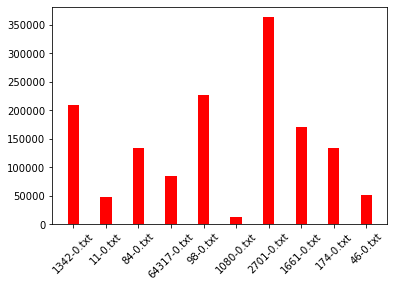

In [2]:
books = [
'https://www.gutenberg.org/files/1342/1342-0.txt',
'https://www.gutenberg.org/files/84/84-0.txt',
'https://www.gutenberg.org/files/11/11-0.txt',
'https://www.gutenberg.org/files/64317/64317-0.txt',
'https://www.gutenberg.org/files/98/98-0.txt',
'https://www.gutenberg.org/files/2701/2701-0.txt',
'https://www.gutenberg.org/files/1661/1661-0.txt',
'https://www.gutenberg.org/files/1080/1080-0.txt',
'https://www.gutenberg.org/files/174/174-0.txt',
'https://www.gutenberg.org/files/46/46-0.txt'
]

test = TextComparer(books)

test.download('https://www.gutenberg.org/files/1342/1342-0.txt')
test.multi_download()

iterable = TextComparer(books)
iterable.multi_download()
my_iterator = iter(iterable)
print(type(my_iterator))
try:
    element1 = next(my_iterator)
    print(element1)
except StopIteration as e:
    print(type(e))
    
gen = test.urllist_generator()
print(type(gen))
for url in gen:
    print(url)
    
b = test.avg_vowels(test.filenames[0])
print(b)

e = test.hardest_read()
print(e)


import matplotlib.pyplot as plt

plot_filename = []
plot_vowels = []
for filename in test.filenames:
    plot_filename.append(filename.split('/')[2])
    plot_vowels.append(test.avg_vowels(filename))
    
plt.bar(plot_filename, plot_vowels, width=0.35, color='red')
plt.xticks(rotation=45)
plt.show()